# What are the top health issues presented, and how do they relate to each mental health status?

### Methodology
1. Explode the Physical Health Issues
2. Extract the top Health status and analyze the percentage of each health issue

In [2]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, to_hex, ListedColormap

# Load the dataset
df = pd.read_csv('data\post_pandemic_remote_work_health_impact_2025.csv')

# Clean the data
df_survey = df.copy()
df_survey['Survey_Date'] = pd.to_datetime(df_survey['Survey_Date'], format='%Y-%m-%d')
df_survey['Physical_Health_Issues'] = df_survey['Physical_Health_Issues'].apply(lambda x: [item.strip() for item in x.split(';')] if pd.notnull(x) else x)
df_survey['Mental_Health_Status'] = df_survey['Mental_Health_Status'].fillna('Non-Diagnosis')

# Definition of the color palette
custom_colors = ['#A6AEAE', '#FB4F2A', '#A90113', '#75000C', '#3C0B09']
custom_cmap = ListedColormap(custom_colors)
smooth_cmap = LinearSegmentedColormap.from_list("custom_gradient", custom_colors, N=256)

In [3]:
# Explode the Physical_Health_Issues column to have one issue per row
df_exploded = df_survey.explode('Physical_Health_Issues')
df_exploded.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain,2,$40K-60K
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Eye Strain,2,$80K-100K


In [4]:
top_health_issues = df_exploded.groupby('Physical_Health_Issues').agg('size').sort_values(ascending=False).reset_index(name='count')
top_health_issues.rename(columns={'Physical_Health_Issues': 'Health_Issue'}, inplace=True)
top_health_issues

,Health_Issue,count
0,Eye Strain,1604
1,Back Pain,1563
2,Shoulder Pain,1507
3,Neck Pain,798
4,Wrist Pain,467


In [5]:
# Percentage of each health issue
top_health_issues['percentage'] = top_health_issues['count'] / top_health_issues['count'].sum() * 100
top_health_issues

,Health_Issue,count,percentage
0,Eye Strain,1604,27.007914
1,Back Pain,1563,26.317562
2,Shoulder Pain,1507,25.374642
3,Neck Pain,798,13.436605
4,Wrist Pain,467,7.863277


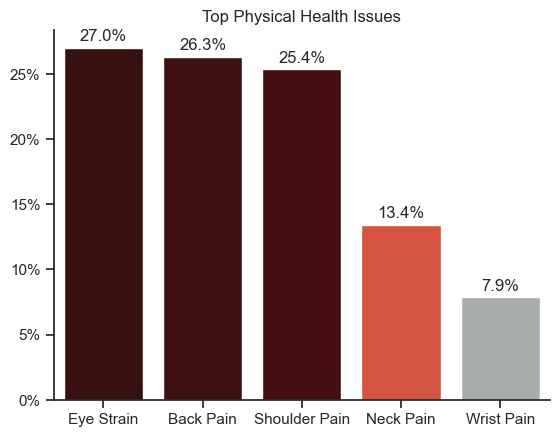

In [6]:
# Plot the percetage of each health issue
sns.set_theme(style='ticks')
sns.barplot(data=top_health_issues, x='Health_Issue', y='percentage', hue='percentage', palette=smooth_cmap)
sns.despine()
plt.legend().remove()
plt.title('Top Physical Health Issues')
plt.xlabel('')
plt.ylabel('')

for i, text in enumerate(top_health_issues['percentage']):
    plt.text(i, text + 0.5, f'{text:.1f}%', ha='center')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,_: f'{y:.0f}%'))

In [7]:
top_health_status = df_survey.groupby('Mental_Health_Status').agg('size').sort_values(ascending=False).reset_index(name='count')
top_health_status.rename(columns={'Mental_Health_Status': 'Mental_Health'}, inplace=True)
top_health_status

,Mental_Health,count
0,Non-Diagnosis,799
1,PTSD,423
2,Anxiety,394
3,Burnout,392
4,Depression,386
5,ADHD,385
6,Stress Disorder,378


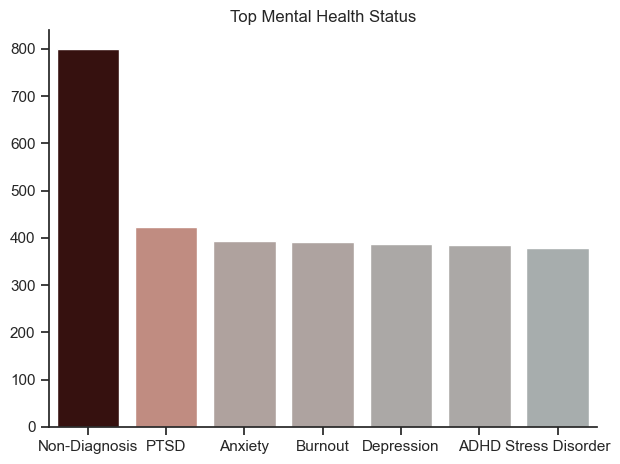

In [8]:
# Plot the top health status
sns.set_theme(style='ticks')
sns.barplot(data=top_health_status, x='Mental_Health', y='count', hue='count', palette=smooth_cmap)
sns.despine()
plt.legend().remove()
plt.title('Top Mental Health Status')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [9]:
# Extract the count of each health Issue per Mental Health Status
grouped_plot = df_exploded.groupby(['Mental_Health_Status', 'Physical_Health_Issues']).size().reset_index(name='count').sort_values(by='count', ascending=False)
grouped_plot.rename(columns={'Physical_Health_Issues': 'Health_Issue'}, inplace=True)
grouped_plot.rename(columns={'Mental_Health_Status': 'Mental_Health'}, inplace=True)
grouped_plot

,Mental_Health,Health_Issue,count
21,Non-Diagnosis,Eye Strain,421
23,Non-Diagnosis,Shoulder Pain,403
20,Non-Diagnosis,Back Pain,393
25,PTSD,Back Pain,224
26,PTSD,Eye Strain,208
28,PTSD,Shoulder Pain,203
11,Burnout,Eye Strain,202
13,Burnout,Shoulder Pain,199
6,Anxiety,Eye Strain,199
0,ADHD,Back Pain,195


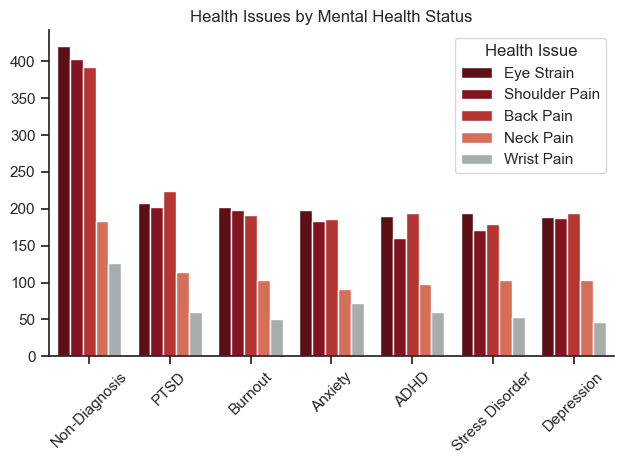

In [10]:
# Plot the health issues by mental health status
sns.set_theme(style='ticks')
n_categories = grouped_plot['Health_Issue'].nunique()
discrete_palette = [to_hex(smooth_cmap(i / n_categories)) for i in range(n_categories)]
sns.barplot(data=grouped_plot, x='Mental_Health', y='count', hue='Health_Issue', palette=discrete_palette[::-1])
sns.despine()
plt.title('Health Issues by Mental Health Status')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Health Issue')

plt.tight_layout()
